## Introduction

I am conducting this analysis with the primary objective of comprehending the relationship between the Euro and Dollar exchange rates. My goal is to discern the impact of significant events on the strength of the Dollar against the Euro.

Additionally, as a supplementary aspect of this project, I aim to uncover insights into the performance of both current and past presidents concerning their efforts to bolster the Dollar's standing relative to the Euro.

## Importing Pandas

In [1]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [2]:
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2023-05-26               1.6439           1.9558            5.3878   
1   2023-05-25               1.6443           1.9558            5.3320   
2   2023-05-24               1.6402           1.9558            5.3397   
3   2023-05-23               1.6282           1.9558            5.3649   
4   2023-05-22               1.6294           1.9558            5.4056   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4630         0.9707                   7.5874              NaN   
1             1.4599         0.9708                   7.5891              NaN   
2             1.4600         0.9732                   7.6005              NaN   
3             1.4571         0.9718                   7.6039              NaN   
4             1.4618         0.9700                   7.6067              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

## Renaming the relevant columns and formating the Time colume to date format

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 
                              'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

## Isolating the columns needed for the analysis

In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts())

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4030     1
1.4113     1
1.4106     1
1.4127     1
1.0751     1
Name: US_dollar, Length: 3734, dtype: int64


## Selecting only valid columns and converting the US_dollar column to float for enable computing

In [5]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Visualizing the Euro to dollar result/trend

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

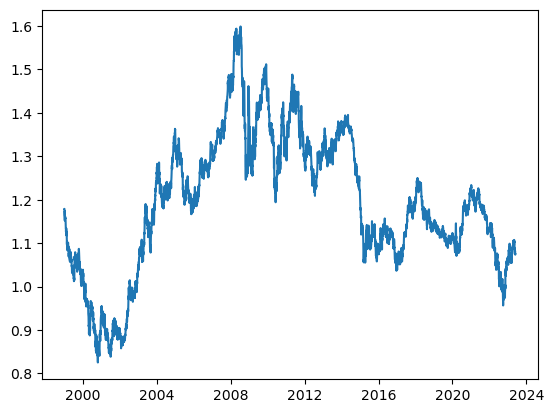

In [7]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

## Using rolling mean to smoothen the line chart

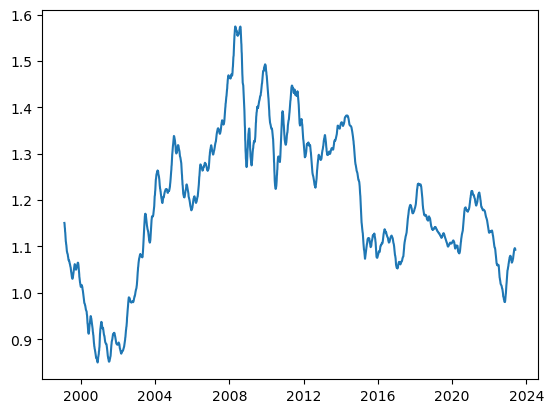

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()

## Filtering the dataframe by covid periods

In [9]:
pd.to_datetime(euro_to_dollar['Time'])
all_period = euro_to_dollar[euro_to_dollar['Time'].dt.year > 2006]
covid_period = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2020]
before_covid = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2019]
post_covid = euro_to_dollar[euro_to_dollar['Time'].dt.year > 2020]
print(before_covid)

           Time  US_dollar  rolling_mean
5182 2019-01-02     1.1397      1.138100
5183 2019-01-03     1.1348      1.137837
5184 2019-01-04     1.1403      1.137777
5185 2019-01-07     1.1445      1.137897
5186 2019-01-08     1.1440      1.138020
...         ...        ...           ...
5432 2019-12-23     1.1075      1.106783
5433 2019-12-24     1.1080      1.107000
5434 2019-12-27     1.1153      1.107490
5435 2019-12-30     1.1189      1.108130
5436 2019-12-31     1.1234      1.108797

[255 rows x 3 columns]


## Visualizing the result before and during covid

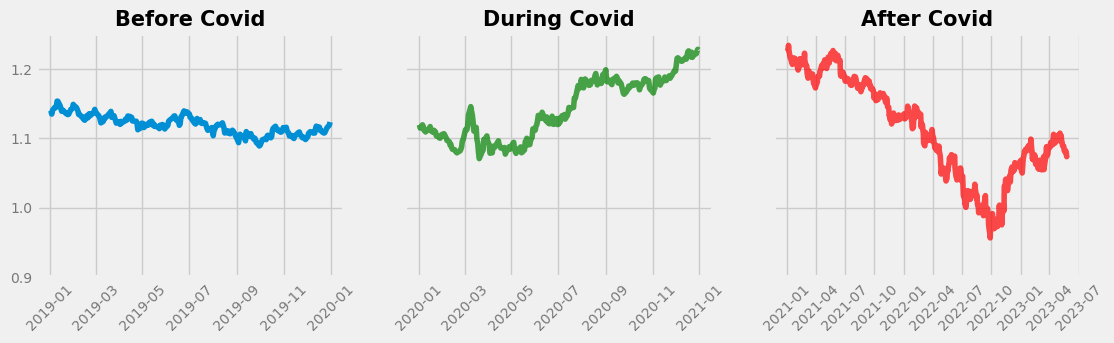

In [120]:

    efore Covid', weight='bold', fontsize=15)

plt.subplot(1, 3, 2)
plt.ylim(0.90, 1.25)
plt.plot(covid_period['Time'], covid_period['US_dollar'], color='green', alpha=0.7)
plt.xticks(rotation=45, alpha=0.5, fontsize=10)
plt.gca().set_yticklabels([])
plt.title('During Covid', weight='bold', fontsize=15)

plt.subplot(1, 3, 3)
plt.ylim(0.9, 1.25)
plt.plot(post_covid['Time'], post_covid['US_dollar'], color='red', alpha=0.7)
plt.xticks(rotation=45, alpha=0.5, fontsize=10)
plt.gca().set_yticklabels([])
plt.title('After Covid', weight='bold', fontsize=15)
plt.show()


In [11]:
print(before_covid['US_dollar'].max())
print(before_covid['US_dollar'].min())
print(before_covid['US_dollar'].mean())
print(covid_period['US_dollar'].max())
print(covid_period['US_dollar'].min())
print(covid_period['US_dollar'].mean())

1.1535
1.0889
1.1194745098039216
1.2281
1.0707
1.1421961089494164


## The following can be deduced:
#### From the analysis carried out the following conclusions can be reached:
##### 1. In 2019, the year before the outbreak there was a stable flunctuation in the rate. It flunctuated between 1.09 to 1.15. A 0.06 difference in change
##### 2. The average rate throughout the year 2019 was 1.12.
##### 3. At the start of the Covid when restrictions were implemented the rate fell sharply to its lowest (1.07) in a year.
##### 4. The rate was highly unpredictable between the end of Februrary and mid March. It rose from around 0.08 to 1.15 and sharply fell to 0.07
##### 5. The rate stabilized between April and June 2020 after the US government allocated money to fight the outbreak (can not determine if the reason was due to the allocation).
##### 6. In June, the Covid restriction was relaxed which saw an immediate increase in the rate. Since then there was a continuous increase till the end of the year.
##### 7. By the end of the year it reached its peak in over two years at 1.23, ending the covid year on a high note.
##### 8. A year after Covid the rate went on a steady decline

## The Russia-Ukraine war effect in view

In [114]:
ukraine_war = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2022]
euro_to_dollar[(euro_to_dollar['Time'] > '2022-02-23') & (euro_to_dollar['Time'] < '2022-10-01')]

,Time,US_dollar,rolling_mean
5990,2022-02-24,1.1163,1.133247
5991,2022-02-25,1.1216,1.132477
5992,2022-02-28,1.1199,1.131797
5993,2022-03-01,1.1162,1.131113
5994,2022-03-02,1.1106,1.130317
...,...,...,...
6140,2022-09-26,0.9646,0.998687
6141,2022-09-27,0.9644,0.997063
6142,2022-09-28,0.9565,0.995067
6143,2022-09-29,0.9706,0.993493


## Visualizing the result

Text(18950.0, 1.174, 'The conflict between Russia and Ukraine commenced on February 24, 2022, and has continued to this day.')

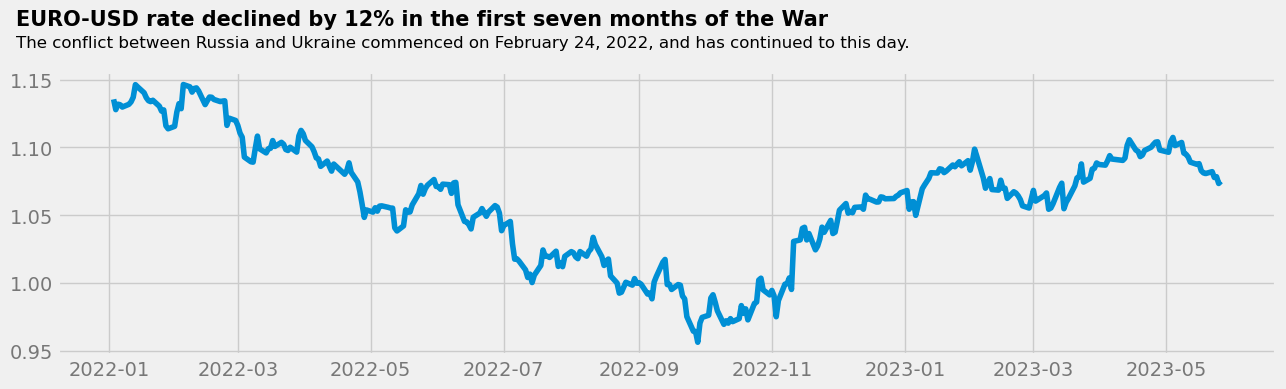

In [115]:
plt.figure(figsize=(14, 3.5))
ax = plt.gca()
plt.plot(ukraine_war['Time'], ukraine_war['US_dollar'])
plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
ax.text(18950.0, 1.19, 'EURO-USD rate declined by 12% in the first seven months of the War',
         fontsize=15, weight='bold')
ax.text(18950.0, 1.174, 'The conflict between Russia and Ukraine commenced on February 24, 2022, and has continued to this day.',
         fontsize=12)

## The graph shows that:
##### 1. in general the rate consistently dropped throughout the first seven months of the war
##### 2. Every time the rate rose in the first seven months it is followed by a significantly decrease in the following days
##### 3. It began a upward trend in the 10th month and has maintained the momentum since then

## Analyzing by President Tenures

In [12]:
Bush = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)]
Obama = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)]
Trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)]
Biden = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2021]
print(Obama)


           Time  US_dollar  rolling_mean
2609 2009-01-02     1.3866      1.327427
2610 2009-01-05     1.3582      1.330587
2611 2009-01-06     1.3332      1.333220
2612 2009-01-07     1.3595      1.336530
2613 2009-01-08     1.3617      1.339343
...         ...        ...           ...
4667 2016-12-23     1.0446      1.059800
4668 2016-12-27     1.0445      1.058693
4669 2016-12-28     1.0401      1.057480
4670 2016-12-29     1.0453      1.056650
4671 2016-12-30     1.0541      1.056063

[2050 rows x 3 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2800178812.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2800178812.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), alpha=0.3)
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2800178812.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2800178812.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2800178812.py:22: UserWarning: FixedFormatter sh

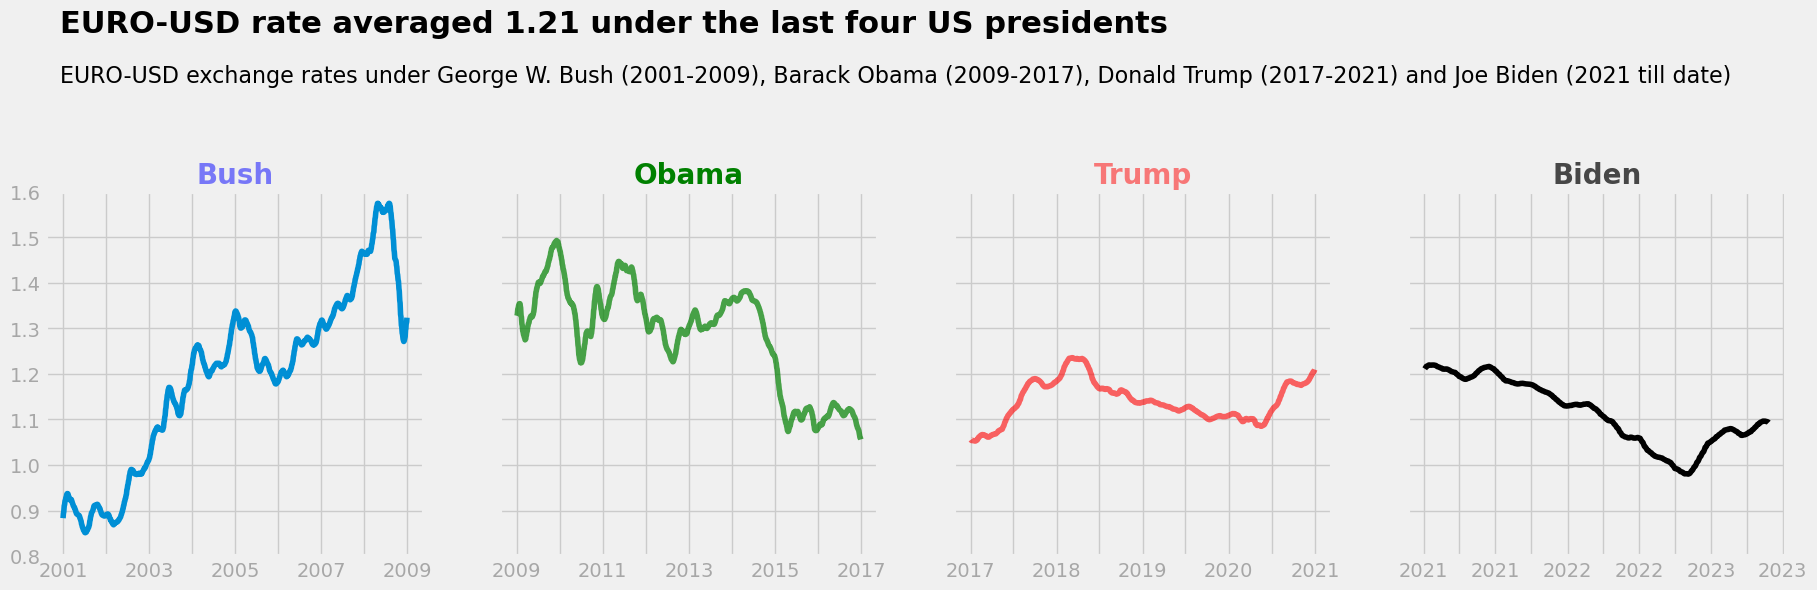

In [117]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,4.5))
ax1.plot(Bush['Time'], Bush['rolling_mean'])
ax1.set_ylim(0.8, 1.6)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.set_title('Bush', color='blue', alpha=0.5, fontsize=20, weight='bold')
ax1.set_yticklabels(ax1.get_yticklabels(), alpha=0.3)

ax2.plot(Obama['Time'], Obama['rolling_mean'], color='green', alpha=0.7)
ax2.set_ylim(0.8, 1.6)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.set_yticklabels([])
ax2.set_title('Obama', color='green', fontsize=20, weight='bold')

ax3.plot(Trump['Time'], Trump['rolling_mean'], color='red', alpha=0.6)
ax3.set_ylim(0.8, 1.6)
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
ax3.set_yticklabels([])
ax3.set_title('Trump', color='red', alpha=0.5, fontsize=20, weight='bold')

ax4.plot(Biden['Time'], Biden['rolling_mean'], color='black')
ax4.set_ylim(0.8, 1.6)
ax4.set_xticklabels(['2021', '', '2021', '', '2022', '', '2022', '', '2023', '', '2023'], alpha=0.3)
ax4.set_yticklabels([])
ax4.set_title('Biden', color='black', alpha=0.7, fontsize=20, weight='bold')
ax1.text(11300.0, 1.95, 'EURO-USD rate averaged 1.21 under the last four US presidents',
         fontsize=22, weight='bold')
ax1.text(11300, 1.84, '''EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021) and Joe Biden (2021 till date)''',
        fontsize=16)

plt.show()

## The plot in full

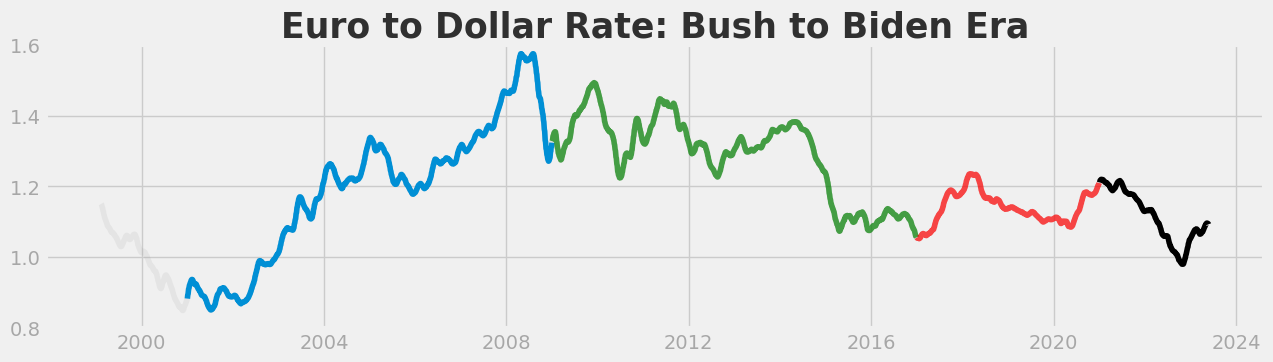

In [103]:
plt.figure(figsize=(14, 3.5))
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], color='grey', alpha=0.1)
plt.plot(Bush['Time'], Bush['rolling_mean'])
plt.plot(Obama['Time'], Obama['rolling_mean'], color='green', alpha=0.7)
plt.plot(Trump['Time'], Trump['rolling_mean'], color='red', alpha=0.7)
plt.plot(Biden['Time'], Biden['rolling_mean'], color='black')
plt.title('Euro to Dollar Rate: Bush to Biden Era', alpha=0.8, fontsize= 25, weight='bold')
plt.ylim(0.8, 1.6)
plt.xticks(alpha=0.3)
plt.yticks(alpha=0.3)
plt.show()

## Conclusion

The rationship between the Euro and dollar was stable a year before the covid with a slight trend downward. However, when the Covid broke out globally in 2020, there was a huge flunctuation in the rate of the currencies making it highly unpredictable in the market.

In March, the rate became stable but took a turn upwards shortly after. This remained the case throughout the year. Immediately after the covid year, in 2021 the rate changed direction again going downwards and remained so from 2021 to the latter stages of 2022. Almost a two year downward trend

The direction has changed upward since September 2022 till date. During this period a major event that occured is the Ukraine war. It seems the Ukraine war further contributed to the downward trend of the chart with a further decline in the rate at the start of the war.

One of the most important insights here is that the rates are sensitive to major global economic events. You can expect the rate to take a huge downward or upward trend during a major occurence that have impact on the global economy and it takes months for a recovery to be made.

Out of the three most recent Presidents, only Obama concluded his term with the exchange rate lower than the rate at the beginning of his presidency. However, the rate seems to be at the most stable under President Trump and it appears that Bush performed the worst while under Biden's administration, the value of the dollar reached its highest point in the last 20 years.

## Recommendation

Indeed, the Euro and Dollar exhibit high volatility, making them potentially attractive currencies for long-term investments. However, it's important to note that volatility also introduces risks, and prudent risk management strategies should be employed.

This study focused on describing the relationship between the Euro and Dollar at different times, a more comprehensive analysis could delve deeper into understanding the underlying reasons behind the fluctuations in their relationship.

Exploring the factors that influence the exchange rate dynamics between these two currencies, such as economic indicators, interest rates, political events, trade balances, and global market trends, can provide valuable insights into the forces driving their movements. A deeper analysis could help identify patterns, correlations, and potential predictive factors that contribute to changes in their exchange rates.

By understanding the underlying drivers of currency fluctuations, investors and policymakers can make more informed decisions and implement appropriate strategies to manage risks and optimize their positions.

In conclusion, a comprehensive analysis that delves into the reasons behind the changes in the relationship between the Euro and Dollar will provide valuable insights for long-term investors and decision-makers in the currency markets.

